In [1]:
%load_ext lab_black

import numpy as np
from matplotlib import pyplot as plt

### 1. Stochastic Gradient Descent para encontrar el máximo de una función

#### Implementar en Python un algoritmo basado en Stochastic Gradient Descent para encontrar numéricamente el mínimo de $f(x) = -(x - 2)^{2} + 3$

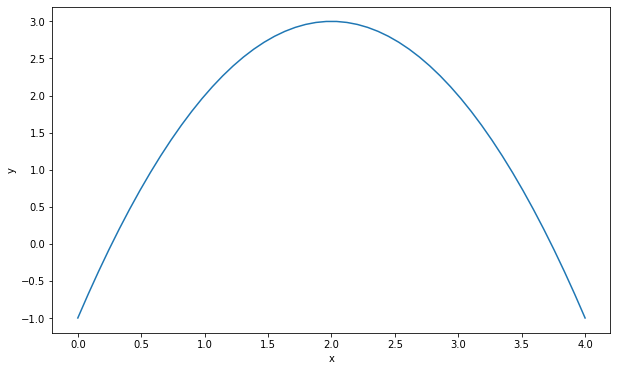

In [2]:
n_samples = 50

f = lambda x: -((x - 2) ** 2) + 3

x = np.linspace(0, 4, n_samples)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
def find_max(start_x, lr, epochs, early_stop=False):
    x = start_x
    history = []
    for epoch in range(epochs):
        grad = -2 * (x - 2)
        if early_stop and np.absolute(grad) < early_stop:
            print(f"Early stop at epoch: {epoch}")
            break
        x += lr * grad
        history.append(x)
    return x, history


max, history = find_max(
    start_x=0.1,
    lr=0.01,
    epochs=10000,
    early_stop=0.01,
)
print(f"El máximo de y se da en x={max:.4f} y={f(max):.4f}")

Early stop at epoch: 295
El máximo de y se da en x=1.9951 y=3.0000


#### ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x?

El máximo valor de la función es $y = 3$ y se da en el cuando $x = 2$

#### ¿En qué momento detuviste la búsqueda y por qué?

En este caso la busqueda se detuvo después de $295$ iteraciones ya que el valor del gradiente era menor a $0.01$ (valor de *early stop*). Este valor fue elegido de manera arbitraria pero puede ser mayor o menor según los requisitos del problema.

#### ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? 

En general los valores random se inicializan con funciones de generación aleatoria que proveen librearias como numpy. En este caso se utilizo un valor de 0.1 para la inicialización para obtener un early stop luego de una cantidad de epochs determinados.

A continuación vemos cuantas epochs son necesarias para converger al aumentar la distancia entre el valor de $x$ que genera del máximo $y$ y el $x$ inicial

Early stop at epoch: 263
Early stop at epoch: 366
Early stop at epoch: 490
Early stop at epoch: 605
Early stop at epoch: 719
Early stop at epoch: 833


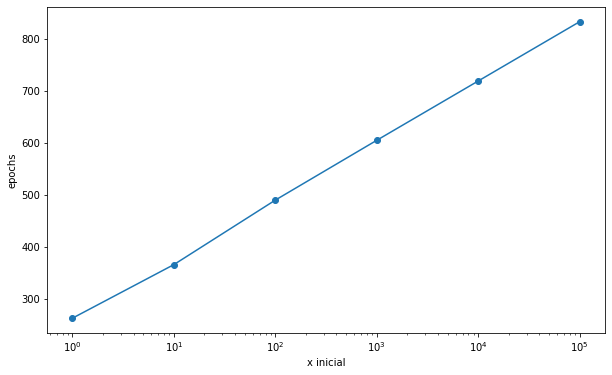

In [4]:
start_x = []
taken_epochs = []

for i in range(6):
    max, history = find_max(
        start_x=10**i,
        lr=0.01,
        epochs=10000,
        early_stop=0.01,
    )
    start_x.append(10**i)
    taken_epochs.append(len(history))

plt.figure(figsize=(10, 6))
plt.scatter(start_x, taken_epochs)
plt.plot(start_x, taken_epochs)
plt.xlabel("x inicial")
plt.ylabel("epochs")
plt.xscale("log")
plt.show()

Puede verse que a medida que el $x$ inicial se aleja de $2$, son necesarias más epochs para converger.

#### ¿Cuáles son los hiper parámetros del algoritmo?

Los hiperparámetros son:
- *learning rate*
- *epochs*
- *early stop*
- *x inicial*

Generamos un dataset con $f(x) = -x^{2} + 4x$ y le añadimos ruido gaussiano.

In [5]:
n_samples = 150

f = lambda x: -((x - 2) ** 2) + 3

x = np.random.uniform(low=0, high=4, size=n_samples)
y = f(x) + np.random.normal(0, 0.4, n_samples)

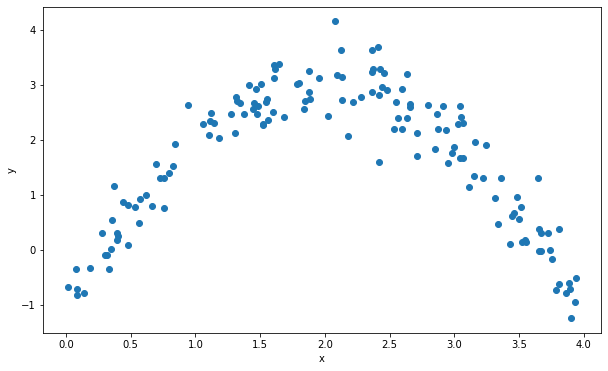

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Creamos un modelo que mediante backpropagation ajuste los pesos $w_{1}$, $w_{2}$ y $w_{3}$ según la función $w_{1}x^{2} + w_{2}x + w_{3}$

In [7]:
class CustomModel:
    def initializeParameters(self):
        W1, W2, W3 = np.random.rand(3)
        self.params = (W1, W2, W3)

    def fit(self, x, y, epochs, learning_rate):
        self.initializeParameters()

        history = []
        n = x.shape[0]

        for _ in range(epochs):
            for i in range(n):
                self.forwardPropagation(x[i], y[i])
                self.backwardPropagation(x[i], y[i], learning_rate)
            history.append(self.cost)

        return history

    def forwardPropagation(self, x, y):
        W1, W2, W3 = self.params
        self.y_hat = W1 * x**2 + W2 * x + W3
        self.cost = (y - self.y_hat) ** 2

    def backwardPropagation(self, x, y, learning_rate):
        W1, W2, W3 = self.params

        dy_hat = -2 * (y - self.y_hat)
        dW1 = dy_hat * x**2
        dW2 = dy_hat * x
        dW3 = dy_hat

        self.params = (
            W1 - learning_rate * dW1,
            W2 - learning_rate * dW2,
            W3 - learning_rate * dW3,
        )

    def predict(self, x):
        W1, W2, W3 = self.params
        return W1 * x**2 + W2 * x + W3

Probamos el modelo con puntos equidistantes en el intervalo $[0, 4]$

In [8]:
custom_model = CustomModel()
history = custom_model.fit(x, y, 100, 0.001)

x_test = np.linspace(0, 4, 50)
y_pred = custom_model.predict(x_test)

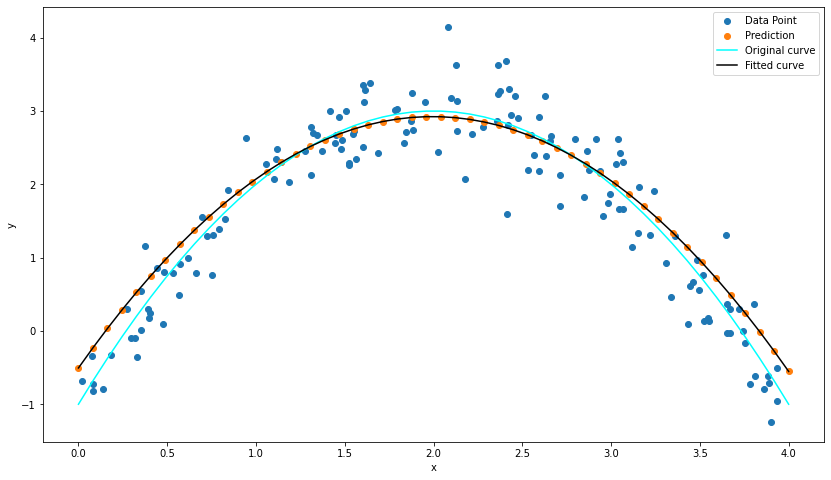

In [9]:
plt.figure(figsize=(14, 8))
plt.scatter(x, y, label="Data Point")
plt.scatter(x_test, y_pred, label="Prediction")
plt.plot(x_test, f(x_test), color="cyan", label="Original curve")
plt.plot(x_test, y_pred, color="k", label="Fitted curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()